# Data Analysis Project

This Jupyter Notebook demonstrates data analysis techniques using Python.

### Setup
- Python libraries used: pandas, numpy, matplotlib
- Data processing and visualization
- Analysis results

### Contents
1. Data Import and descriptive statistics
2. Data Cleaning
3. Analysis
4. Visualization

## Data import
Let's import the MovieLensDataLoader. This class loads the two datasets (ratings and movies) into two different dataframes and makes them available to us.

In [2]:
from src.data.data_loader import MovieLensDataLoader
from src.config import Config

config = Config()

# Create data loader instance
data_loader = MovieLensDataLoader(config)

# Load data with load_data() function
data_loader.load_data()

# Get ratings and movies dataframes
ratings_df = data_loader.ratings_df
movies_df = data_loader.movies_df

# Print the first 5 rows of the dataframes
print(ratings_df.head())
print(movies_df.head()) 

Loaded 33832162 ratings and 86537 movies.
   userId  movieId  rating   timestamp
0       1        1     4.0  1225734739
1       1      110     4.0  1225865086
2       1      158     4.0  1225733503
3       1      260     4.5  1225735204
4       1      356     5.0  1225735119
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


## Summary Statistics

In this section we are going to look at the summary statistics of both the ratings and movies dataframes.

The _data_ sub-package offers the _summary\_statistic_ module which already implements function to extract the key statistics from the two dataframes.


In [10]:
# Since the notebook caches the data, we need to reload the module
# to see the changes
import importlib
from src.data import summary_statistics

importlib.reload(summary_statistics)

# Import the MovieLensDataAnalyzer class
from src.data.summary_statistics import MovieLensDataAnalyzer

analyzer = MovieLensDataAnalyzer()

# Let's see the main characteristics of the data
key_stats = analyzer.analyze_data(ratings_df, movies_df)


Number of ratings: 33832162
Number of users: 330975
Number of movies: 86537
Number of reviewed movies: 83239


We have seen that the amount of data we are working with is noticeable. With 33 million ratings assigned to more than 80 thousand movies, we are able to build a robust recommendation system. However, this large dataset presents both opportunities and challenges. Despite having millions of ratings, we're facing significant sparsity in our user-item matrix—with 330,975 users and 86,537 movies, over 99.8% of possible interactions remain unobserved. This sparsity is typical in recommendation systems and requires specialized approaches to extract meaningful patterns.

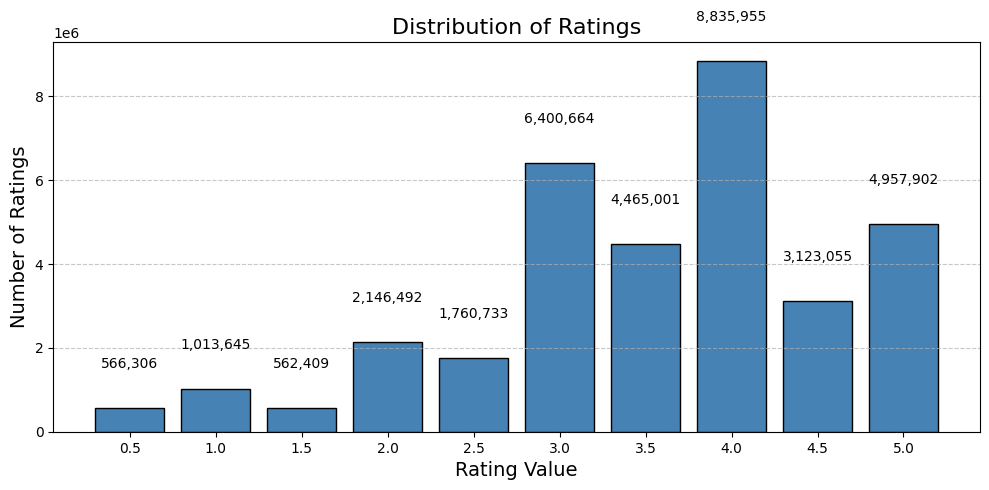

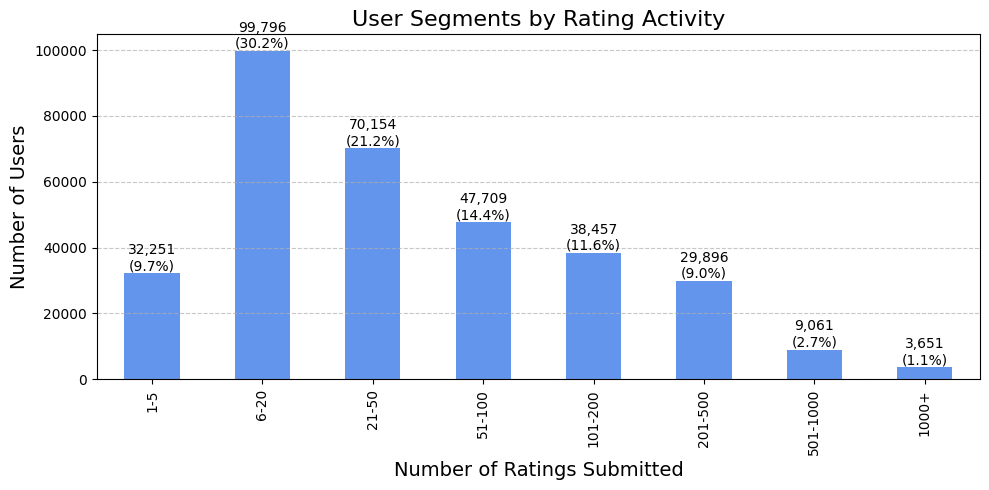

In [11]:
analyzer.plot_ratings_distribution(ratings_df)

The top chart shows people tend to favor positive ratings, with 4.0 stars being the most common choice (8.8 million ratings). It seems people are more motivated to rate content they enjoy rather than what they dislike. What's particularly interesting is the notable drop between 4.0 and 4.5 ratings – this suggests viewers are somewhat selective about giving those near-perfect scores, perhaps reserving them for truly exceptional films.

The user activity chart reveals that most viewers are casual raters. About 75% of users provide fewer than 100 ratings total, with the largest segment (30.2%) giving only 6-20 ratings throughout their entire history. Meanwhile, we have a small but dedicated group of power users – just 4% of the community – who've submitted more than 500 ratings each. This creates a classic "long tail" distribution that makes building recommendation systems challenging, as we have limited data points to understand the preferences of most users.

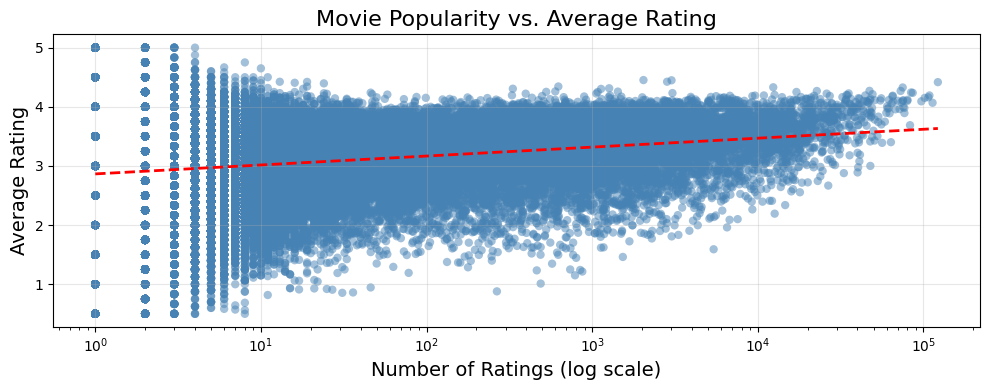

In [17]:
analyzer = MovieLensDataAnalyzer()

analyzer.plot_popularity_vs_rating(ratings_df)

What immediately stands out is the funnel-shaped pattern. Movies with very few ratings (left side) show extreme variability in their average scores—some have perfect 5.0 ratings while others have very low scores. As we move right toward more popular movies (those with thousands or tens of thousands of ratings), this variability narrows significantly, with ratings converging toward a range between approximately 3.0 and 4.0.

The red trend line confirms a slight positive correlation: as movies receive more ratings, their average score tends to increase gradually. This suggests that widely-seen movies generally receive somewhat better ratings than obscure ones, though the effect is modest.

<Figure size 1400x800 with 0 Axes>

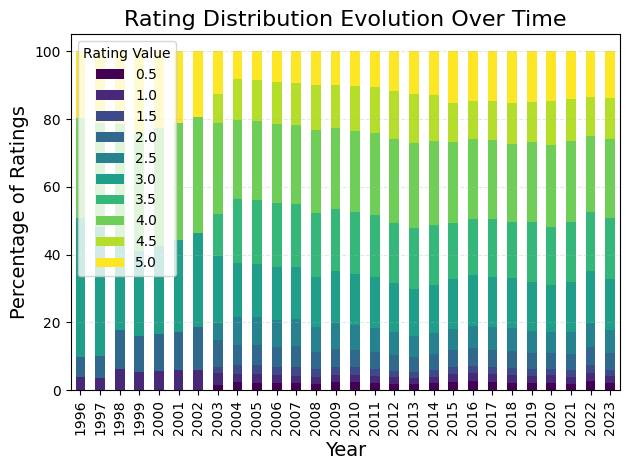

In [22]:
analyzer.plot_rating_evolution(ratings_df)

This stacked area chart reveals how movie rating patterns have evolved from 1996 to 2023. The most notable transition occurs around 2000-2001, when ratings shift toward a more positive distribution dominated by 4.0 and above scores.

An important detail is the introduction of half-star ratings (0.5, 1.5, 2.5, 3.5, 4.5) starting in 2003, which expanded the rating granularity. Despite this change, the overall positive skew remained consistent for the past two decades.

The persistence of this pattern suggests stable user behavior over time, with people consistently more motivated to rate movies they enjoyed rather than those they disliked. This temporal consistency is beneficial for our recommendation system, as it indicates we won't need significant era-based normalization when comparing ratings from different years.